In [2]:
import tensorflow as tf
import numpy as np
import keras
print(tf.__version__)

2.4.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


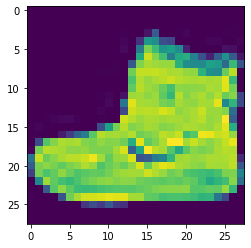

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [6]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(128, activation = tf.nn.relu))
model.add(keras.layers.Dense(10, activatio n= tf.nn.softmax))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
train_images_scaled = train_images / 255
model.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
model.fit(train_images_scaled, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 640us/step - loss: 0.6375 - accuracy: 0.7785
Epoch 2/5
1875/1875 [==============================] - 1s 657us/step - loss: 0.3872 - accuracy: 0.8617
Epoch 3/5
1875/1875 [==============================] - 1s 606us/step - loss: 0.3393 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 1s 610us/step - loss: 0.3144 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 1s 625us/step - loss: 0.2962 - accuracy: 0.8923


In [12]:
test_images_scaled = test_images / 255
model.evaluate(test_images_scaled, test_labels)

313/313 [==============================] - 0s 573us/step - loss: 0.3502 - accuracy: 0.8713


[0.35016846656799316, 0.8712999820709229]

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('loss') < 0.4):
            self.model.stop_training = True
            print('loss is low, training cancelled')

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images_scaled = training_images / 255
test_images_scaled = test_images / 255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images_scaled, training_labels, epochs = 5, callbacks = [callbacks])

TypeError: fit() got an unexpected keyword argument 'epoch'